ML-AI Assignment

2023-03-18

T N Arjun Raj

### ANLAYSING THE GIVEN DATASET 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data_filename='credit_card_default.csv'
df=pd.read_csv(data_filename)

df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0.0,1.0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000.0,1.0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000.0,0.0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000.0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22005,22006,110000,2,1,2,27,0,0,0,0,0,0,110553,108387,111427,111697,111956,111325,4000,4800,4300,4300,4400,3874.0,1.0
22006,22007,60000,2,1,2,27,1,-2,-2,-1,-1,-1,0,0,0,150,1179,778,0,0,150,1179,778,496.0,0.0
22007,22008,80000,2,1,2,24,0,0,0,-1,-1,0,42377,32482,20782,11632,64989,62392,2008,1000,11632,64989,1470,5027.0,0.0
22008,22009,230000,2,2,2,28,0,0,0,0,0,0,111295,112425,95155,72983,70329,69340,4473,5000,2624,2360,3100,1600.0,0.0


In [47]:
### Dataset description:-

"""

There are 25 variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

source:: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset 

"""

'\n\nThere are 25 variables:\n\n    ID: ID of each client\n    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit\n    SEX: Gender (1=male, 2=female)\n    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)\n    MARRIAGE: Marital status (1=married, 2=single, 3=others)\n    AGE: Age in years\n    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)\n    PAY_2: Repayment status in August, 2005 (scale same as above)\n    PAY_3: Repayment status in July, 2005 (scale same as above)\n    PAY_4: Repayment status in June, 2005 (scale same as above)\n    PAY_5: Repayment status in May, 2005 (scale same as above)\n    PAY_6: Repayment status in April, 2005 (scale same as above)\n    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)\n    BILL_AMT2:

In [48]:
pd.pandas.set_option('display.max_columns',None)
df=df.rename(columns= lambda x:x.lower() )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22010 entries, 0 to 22009
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          22010 non-null  int64  
 1   limit_bal                   22010 non-null  int64  
 2   sex                         22010 non-null  int64  
 3   education                   22010 non-null  int64  
 4   marriage                    22010 non-null  int64  
 5   age                         22010 non-null  int64  
 6   pay_1                       22010 non-null  int64  
 7   pay_2                       22010 non-null  int64  
 8   pay_3                       22010 non-null  int64  
 9   pay_4                       22010 non-null  int64  
 10  pay_5                       22010 non-null  int64  
 11  pay_6                       22010 non-null  int64  
 12  bill_amt1                   22010 non-null  int64  
 13  bill_amt2                   220

In [49]:
print(df.nunique())
df['pay_6'].value_counts()


id                            22010
limit_bal                        77
sex                               2
education                         7
marriage                          3
age                              55
pay_1                            11
pay_2                            11
pay_3                            11
pay_4                            11
pay_5                            10
pay_6                            10
bill_amt1                     17368
bill_amt2                     17059
bill_amt3                     16804
bill_amt4                     16435
bill_amt5                     16054
bill_amt6                     15653
pay_amt1                       6483
pay_amt2                       6363
pay_amt3                       5937
pay_amt4                       5646
pay_amt5                       5602
pay_amt6                       5598
default payment next month        2
dtype: int64


 0    11849
-1     4330
-2     3389
 2     2193
 3      150
 7       37
 4       35
 6       16
 5        9
 8        2
Name: pay_6, dtype: int64

In [50]:
# missing_values=0  ### identifying how missing values are represented in the dataset ()
missing_values=np.nan

#### Identifying the target column:-

target_col="default payment next month"

## convert missing values to NaN
if not ( missing_values is np.nan):
    df.loc[:,[i for i in df.columns.to_list() if i != target_col]]=df.loc[:,[i for i in df.columns.to_list() if i != target_col]].replace(0,np.nan)
df

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0.0,1.0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000.0,1.0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000.0,0.0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000.0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22005,22006,110000,2,1,2,27,0,0,0,0,0,0,110553,108387,111427,111697,111956,111325,4000,4800,4300,4300,4400,3874.0,1.0
22006,22007,60000,2,1,2,27,1,-2,-2,-1,-1,-1,0,0,0,150,1179,778,0,0,150,1179,778,496.0,0.0
22007,22008,80000,2,1,2,24,0,0,0,-1,-1,0,42377,32482,20782,11632,64989,62392,2008,1000,11632,64989,1470,5027.0,0.0
22008,22009,230000,2,2,2,28,0,0,0,0,0,0,111295,112425,95155,72983,70329,69340,4473,5000,2624,2360,3100,1600.0,0.0


### to identify and remove unwanted columns and rows:-

In [51]:
cols_nan_num_ser=df.shape[0]-df.count()
print(cols_nan_num_ser) ### number of nan values each column
too_many_nan_col_list=[i for i in cols_nan_num_ser.index if cols_nan_num_ser[i]> 0.4*df.shape[0]]  ### these columns have more than 50% of its values as NaN; so it cannot be meaningfully imputed

print( '\nThe following columns have more than 40% of its values as NaN; so it cannot be meaningfully imputed. Therefore the following column(s) should be dropped:-')
print(too_many_nan_col_list)

id                            0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_1                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      1
default payment next month    1
dtype: int64

The following columns have more than 40% of its values as NaN; so it cannot be meaningfully imputed. Therefore the following column(s) should be dropped:-
[]


In [52]:
df_unique=df.nunique()
print(df_unique) ### to determine if there any columns that have all identical values

all_unique_col_list=[i for i in cols_nan_num_ser.index if (df_unique[i]==df.shape[0] and (np.issubdtype(df[i].dtype,np.int_) or np.issubdtype(df[i].dtype,np.object_) ) )] ## these categorical columns have a unique value for every instance so they do not present any information that causes the instance to be linked to its target column value
print('\nThese categorical columns have a unique value for every instance so they do not present any information that causes the instance to be linked to its target column value (unless further feature engineering is done to split the data in this column into several meaningful columns for which more than one instance would share a common value ) :- ', all_unique_col_list)

one_unique_col_list=[i for i in cols_nan_num_ser.index if df_unique[i]==1]
print('\nThese columns have only one unique value for every instance so they do not present any meaningful information that causes the instance to be linked to its target column value:- ', one_unique_col_list)


id                            22010
limit_bal                        77
sex                               2
education                         7
marriage                          3
age                              55
pay_1                            11
pay_2                            11
pay_3                            11
pay_4                            11
pay_5                            10
pay_6                            10
bill_amt1                     17368
bill_amt2                     17059
bill_amt3                     16804
bill_amt4                     16435
bill_amt5                     16054
bill_amt6                     15653
pay_amt1                       6483
pay_amt2                       6363
pay_amt3                       5937
pay_amt4                       5646
pay_amt5                       5602
pay_amt6                       5598
default payment next month        2
dtype: int64

These categorical columns have a unique value for every instance so they do not presen

In [53]:
### removing duplicated columns (by looking for same column name, not column values), if any
df = df.loc[:,~df.columns.duplicated()].copy()
# df

In [55]:
### removing unwanted columns and rows:-
exclude_col_list=too_many_nan_col_list + all_unique_col_list +one_unique_col_list 

df=df.drop(exclude_col_list,axis=1)
    

print('dropping these columns from the dataframe because they are not helpful for the machine learning task:-\n ',exclude_col_list)
df

dropping these columns from the dataframe because they are not helpful for the machine learning task:-
  ['id']


,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0.0,1.0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000.0,1.0
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000.0,0.0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000.0,0.0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22005,110000,2,1,2,27,0,0,0,0,0,0,110553,108387,111427,111697,111956,111325,4000,4800,4300,4300,4400,3874.0,1.0
22006,60000,2,1,2,27,1,-2,-2,-1,-1,-1,0,0,0,150,1179,778,0,0,150,1179,778,496.0,0.0
22007,80000,2,1,2,24,0,0,0,-1,-1,0,42377,32482,20782,11632,64989,62392,2008,1000,11632,64989,1470,5027.0,0.0
22008,230000,2,2,2,28,0,0,0,0,0,0,111295,112425,95155,72983,70329,69340,4473,5000,2624,2360,3100,1600.0,0.0


In [56]:
# df[target_col].isna()
df.dropna(subset= [target_col], inplace=True)


In [57]:
### separate target column from feature columns

if not(target_col==None):## supervised learning
    X_df,y_df=df.drop(labels=[target_col],axis=1),df[target_col]
    print(X_df.columns.to_list())
else: ## unsupervised learning
    X_df=df

['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']


In [58]:

### identify numerical (int or float) columns and non-numeric columns


X_df_num=X_df.select_dtypes(np.number)

num_feature_cols_list=X_df_num.columns.to_list()
int_feature_cols_list=X_df.select_dtypes(np.int_).columns.to_list()
float_feature_cols_list=X_df.select_dtypes(np.int_).columns.to_list()


non_num_feature_cols=[i for i in X_df.columns if i not in X_df_num.columns]

### feature engineering:-

In [59]:
'''
### debatable feature engineering:-

make 6,7,8 together in pay_n...


'''

for col in [f'pay_{n}' for n in range(1,7)]:
    df[col]=df[col].replace([5,6,7,8],5)
df.nunique()

limit_bal                        77
sex                               2
education                         7
marriage                          3
age                              55
pay_1                             8
pay_2                             8
pay_3                             8
pay_4                             8
pay_5                             7
pay_6                             7
bill_amt1                     17367
bill_amt2                     17059
bill_amt3                     16804
bill_amt4                     16434
bill_amt5                     16053
bill_amt6                     15653
pay_amt1                       6483
pay_amt2                       6363
pay_amt3                       5936
pay_amt4                       5645
pay_amt5                       5602
pay_amt6                       5598
default payment next month        2
dtype: int64

In [61]:

### to remove highly correlated cols because they provide redundant information

if not(X_df.shape[1] >200) : ## there are way too many columns and looping over each column is time-consuming; better to skip    

    high_corr=0.8


    ### a function to get feature pairs that have high correlation 
    def get_high_corr_column_pairs(df,high_corr=1,suppress_verbose_output=False):
        corr_df=df.corr()
        corr_df_ndarray=corr_df.values

        ## remove lower half triangle of repeated values ; so that the same columns pairs do not appear twice
        for i in range(corr_df_ndarray.shape[0]):
            j=i
            while j>=0:
                corr_df_ndarray[i][j]=np.NaN
                j=j-1


        ## condition to get columns pairs that have high correlation
        high_corr_index_bool_arr= ((corr_df_ndarray > high_corr) | (corr_df_ndarray < -high_corr)) & (corr_df_ndarray != float(1))


        high_corr_index_list=np.argwhere(high_corr_index_bool_arr)

        if suppress_verbose_output==False:
            if len(high_corr_index_list)==0:
                print('There are no highly correlated columns')
            else:
                print('columns with high correlation are :- ')

        high_corr_columns_list=[]
        for ind,tup in enumerate(high_corr_index_list):
            high_corr_columns_list.append((corr_df.index[tup[0]],corr_df.columns[tup[1]],np.round_(corr_df_ndarray[tup[0],tup[1]],decimals=3)))
            if suppress_verbose_output==False:
                print(corr_df.index[tup[0]],' has a signifcant correlation of', np.round_(corr_df_ndarray[tup[0],tup[1]],decimals=3),'with', corr_df.columns[tup[1]])
        return high_corr_columns_list ### output is a list containing tuples of the form (highly_correlated_column_1_name,highly_correlated_column_2_name,pearson_correlation_coefficient)

    high_corr_column_pairs=get_high_corr_column_pairs(X_df,high_corr=high_corr,suppress_verbose_output=False)
    
    to_remove_set=set()
    
    for tup in high_corr_column_pairs:

        ## to find and drop the column in the correlated pair that is least correlated with the target column 
        ## not tested
        
        
        corr_coef_1st_in_pair=np.corrcoef(df[tup[0]].values,y_df.values)[0,1]
        corr_coef_2nd_in_pair=np.corrcoef(df[tup[1]].values,y_df.values)[0,1]
        if corr_coef_1st_in_pair >= corr_coef_2nd_in_pair:
            to_remove_set.add(tup[0])
        else:
            to_remove_set.add(tup[1])
    
#     to_remove_set=set(to_remove_list)
    print('the following columns will be removed : ', to_remove_set)
    X_df=X_df.drop(to_remove_set,axis=1)
    print('X_df.shape ',X_df.shape)


columns with high correlation are :- 
pay_4  has a signifcant correlation of 0.822 with pay_5
pay_5  has a signifcant correlation of 0.809 with pay_6
bill_amt1  has a signifcant correlation of 0.951 with bill_amt2
bill_amt1  has a signifcant correlation of 0.888 with bill_amt3
bill_amt1  has a signifcant correlation of 0.856 with bill_amt4
bill_amt1  has a signifcant correlation of 0.832 with bill_amt5
bill_amt1  has a signifcant correlation of 0.809 with bill_amt6
bill_amt2  has a signifcant correlation of 0.923 with bill_amt3
bill_amt2  has a signifcant correlation of 0.888 with bill_amt4
bill_amt2  has a signifcant correlation of 0.862 with bill_amt5
bill_amt2  has a signifcant correlation of 0.835 with bill_amt6
bill_amt3  has a signifcant correlation of 0.923 with bill_amt4
bill_amt3  has a signifcant correlation of 0.891 with bill_amt5
bill_amt3  has a signifcant correlation of 0.861 with bill_amt6
bill_amt4  has a signifcant correlation of 0.947 with bill_amt5
bill_amt4  has a s

### convert to numpy array in order to use functions in sklearn library


In [62]:
### convert to numpy array in order to use functions in sklearn library
X=X_df.values
if not(target_col==None):## supervised learning
    y=y_df.values
    
### create a dictionary to convert column names of the dataframe to indices of the np.array X
col_name_to_ind_convert_X_dict=dict([(v,k) for k,v in dict(enumerate(X_df.columns.to_list())).items()])
print(col_name_to_ind_convert_X_dict)
# X_df

{'limit_bal': 0, 'sex': 1, 'education': 2, 'marriage': 3, 'age': 4, 'pay_1': 5, 'pay_2': 6, 'pay_3': 7, 'pay_6': 8, 'bill_amt1': 9, 'pay_amt1': 10, 'pay_amt2': 11, 'pay_amt3': 12, 'pay_amt4': 13, 'pay_amt5': 14, 'pay_amt6': 15}


### separate train and test data

In [64]:
from sklearn.model_selection import train_test_split

if not(target_col==None):## supervised learning

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
else:
    X_train, X_test = train_test_split(X,test_size=0.2,random_state=1)


### Imputation

In [65]:
print('total number of NaN in the array X_train before imputation :- ',(X_train!=X_train).sum())

## to decide which cols require imputation

need_imputation_cols_list=[j for j in X_df.columns.to_list() if not(X_df.count()[j]==X_df.shape[0])]
print('Only the following columns have missing values :-',need_imputation_cols_list)



total number of NaN in the array X_train before imputation :-  0
Only the following columns have missing values :- []


In [66]:
### categorise features into different types to decide which statistical imputation strategy to use

if not(len(need_imputation_cols_list)== 0):

    mode_impute_strategy_cols_list=[]
    median_impute_strategy_cols_list=[]


    ### mode imputation might be a better strategy for a feature column if few only specific values are repeated for many instances [[2023-03-11]]-1332-28 
    if not(X_df.shape[1] >200) : ## there are way too many columns and looping over each column is time-consuming; better to skip    
        for col in X_df.columns:
            if float(X_df.nunique()[col]) < 0.1*X_df.shape[0]: ### use most_frequent strategy for statistical imputation when the number of unique values in the column are few (< 10% of the total values)
                mode_impute_strategy_cols_list.append(col)
            elif col in X_df_num.columns:
                median_impute_strategy_cols_list.append(col)
            else:
                mode_impute_strategy_cols_list.append(col)
        print('list of columns to use mode strategy of statistical imputation for ; use mode strategy for either columns that are non-numerical or for columns that are numerical but only have a few unique values (<10% no. of instances) :- \n'
              ,mode_impute_strategy_cols_list) #### list of columns to use mode strategy of statistical imputation for ; use mode strategy for either columns that are non-numerical or for columns that are numerical but only have a few unique values (<10% no. of instances)
        print('list of columns to use median strategy of statistical imputation for ; use for numeric columns for which mode strategy is not ideal:- \n',
              median_impute_strategy_cols_list) #### list of columns to use median strategy of statistical imputation for ; use for numeric columns for which mode strategy is not ideal
    else:
        median_impute_strategy_cols_list=float_feature_cols_list
        mode_impute_strategy_cols_list= int_feature_cols_list


    X_train.shape

In [67]:
### making an alternative function for ColumnTransformer that somewhat helps when working with numpy arrays

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer



'''
(I wrote this function as an alternative for the ColumnTransformer class 
because the ColumnTransformer class mixes up the Columns after transforming ;
therefore there is no easy way to know which columns in the ndarray correspond 
to which columns in the original dataframe after the ColumnTransformer class acts on the ndarray )

The function extracts specified columns from that dataset; runs a transformation on the columns 
(eg. SimpleImputer, OneHotEncoder etc.) ; then substitutes back the transformed columns in the original data set X_train 
 
The transformers argument of this function mimics the structure of the transformers argument of the ColumnTransformer class
'''
def my_seq_col_transformer(transformers,X_train_fn_var,X_test_fn_var,fit_test=False):
    
    X_train_fn_var=X_train_fn_var.copy()
    X_test_fn_var=X_test_fn_var.copy()
    
    
    result_list=[]
    for ind,tup in enumerate(transformers):
        if not ind==0:
            print('please do not use multiple transformers; the function might not be ready for use with multiple transformer tuples')
            ## 
            
        '''
        The transformers argument of this function mimics the structure 
        of the transformers argument of the ColumnTransformer class
        '''
        operation_class=tup[1]
        cols_to_transform_list=tup[2]
#         print(len(cols_to_transform_list))
        if len(cols_to_transform_list)==0 :
            result_list.append((X_train_fn_var, X_test_fn_var, 'No operation done','No operation done'))
            print('No ',type(operation_class).__name__,'operations done because cols_to_transform_list is empty')
            break
           
            
        cols_to_transform_ind_list=[col_name_to_ind_convert_X_dict[col_name] for col_name in cols_to_transform_list ]
        
        
        X_train_fn_var_few_cols_transformed=operation_class.fit_transform(X_train_fn_var[:,cols_to_transform_ind_list])
        
        
        
        X_test_fn_var_few_cols_transformed=operation_class.transform(X_test_fn_var[:,cols_to_transform_ind_list])

        
        
        
        for ind,col_ind in enumerate(cols_to_transform_ind_list):
            X_train_fn_var[:,col_ind]=X_train_fn_var_few_cols_transformed[:,ind]
            X_test_fn_var[:,col_ind]=X_test_fn_var_few_cols_transformed[:,ind]
            
        result_list.append((X_train_fn_var, X_test_fn_var, operation_class,type(operation_class).__name__))
    
    '''
    returns a list with tuples of the following form
    (transformed X_train, transformed X_test, operation_class,type(operation_class).__name__)
    '''    
    return result_list



In [68]:


### IMPUTATION:-

### list of columns for which most_frequent imputation is to be done:- 
cols_to_impute_mode_strategy=[i for i in need_imputation_cols_list if i in mode_impute_strategy_cols_list]
cols_to_impute_median_strategy=[i for i in need_imputation_cols_list if i in median_impute_strategy_cols_list]

cols_to_transform_ind_list=[col_name_to_ind_convert_X_dict[col_name] for col_name in cols_to_impute_median_strategy ]



result_list=my_seq_col_transformer(transformers=[('mode_imputer',SimpleImputer(strategy='most_frequent'),cols_to_impute_mode_strategy)],X_train_fn_var=X_train,X_test_fn_var=X_test)

### assign the transformed data to original data
X_train=result_list[-1][0]
X_test=result_list[-1][1]


### median imputation
result_list=my_seq_col_transformer(transformers=[('median_imputer',SimpleImputer(strategy='median'),cols_to_impute_median_strategy)],X_train_fn_var=X_train,X_test_fn_var=X_test)
### assign the transformed data to original data
X_train=result_list[-1][0]
X_test=result_list[-1][1]


                # use_df=True
                # if use_df==True:
                #     if (X_train.values!=X_train.values).sum()==0:
                #         # np.isnan(X_train).sum()
                #         print('\ntotal number of nan values in X_train is 0. Imputation step is successful.')

                # else:
if (X_train!=X_train).sum()==0:
    # np.isnan(X_train).sum()
    print('\ntotal number of nan values in X_train is 0. Imputation step is successful.')
    

# X_train

No  SimpleImputer operations done because cols_to_transform_list is empty
No  SimpleImputer operations done because cols_to_transform_list is empty

total number of nan values in X_train is 0. Imputation step is successful.


### Outlier detection

In [69]:
perform_IQR_outlier_detection_bool=False ##()

if perform_IQR_outlier_detection_bool:
    num_feature_cols_ind_list=[col_name_to_ind_convert_X_dict[col_name] for col_name in num_feature_cols_list ]

    X_train_num=X_train[:,num_feature_cols_ind_list]



    ### do not remove outliers from columns that have too few unique values to begin with :-
    num_cols_with_enough_unique_values=[col_name for col_name in num_feature_cols_list if X_df.nunique()[col_name] > 0.1*X_df.shape[0]]

    cols_list_to_detect_outliers=num_cols_with_enough_unique_values
    cols_list_to_detect_outliers_ind_list=[col_name_to_ind_convert_X_dict[col_name] for col_name in cols_list_to_detect_outliers ]

    print('Detect outliers only from these columns:- ',cols_list_to_detect_outliers)


    ### detect outliers using iqr method


    #     print(outlier_list)
    outlier_list=[]
    for ind in cols_list_to_detect_outliers_ind_list:
        col_arr=X_train[:,ind]
        q1=np.percentile(col_arr,25)
        q3=np.percentile(col_arr,75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        for elem_row_num,elem in enumerate(col_arr.flatten()):
            if elem <lower or elem > upper :
                outlier_list.append((elem_row_num,ind,elem))

    #### remove rows with outliers 

    remove_iqr_outliers=True if len(outlier_list) < 0.1*X_train.shape[0] else False ##()

    to_delete_list=[]
    if remove_iqr_outliers:
        for tup in outlier_list: 
            to_delete_list.append(tup[0])

        print(len(outlier_list), ' outlier rows removed from training dataset')

        X_train=np.delete(X_train,to_delete_list,axis=0)
        if not(target_col==None):## supervised learning
            y_train=np.delete(y_train,to_delete_list,axis=0)


In [70]:
### to remove outliers via automatic outlier detection using lof
if not(X_train.shape[0] > 5000): ## LocalOutlierFactor seems to be time consuming if there are too many instances
    from sklearn.neighbors import LocalOutlierFactor
    lof=LocalOutlierFactor()
    lof_array=lof.fit_predict(X_train)

    to_delete_indices_list=[]
    # print(lof_array)
    for ind,i in enumerate(lof_array):
        if i == -1 :        
            to_delete_indices_list.append(ind)

    X_train=np.delete(X_train,to_delete_indices_list,axis=0)
    if not(target_col==None):## supervised learning
        y_train=np.delete(y_train,to_delete_indices_list,axis=0)
    X_train.shape

    print(len(to_delete_indices_list),' outlier rows deleted from X_train')

### ENCODING CATEGORICAL COLUMNS

In [71]:
### categorise categorical-feature cols into different types to do various types of encoding
print('Non-numerical feature cols are : ',non_num_feature_cols)

### identify which categorical features are nominal and ordinal
nominal_features_list=[] ###() 
ordinal_features_list=[]

##()
# specify the order of ordinal feature columns if any; it is alphabetically ordered by default 


Non-numerical feature cols are :  []


In [72]:
# ### ordinal feature encoding 
if not len(ordinal_features_list)==0:

    from sklearn.preprocessing import OrdinalEncoder

    result_list=my_seq_col_transformer(transformers=[('ordinal_enc',OrdinalEncoder(),ordinal_features_list)],X_train_fn_var=X_train,X_test_fn_var=X_test,fit_test=True)

    ### assign the transformed data to original data
    X_train=result_list[-1][0]
    X_test=result_list[-1][1]




In [73]:
# ### nominal feature encoding using dummy variable encoding
if not len(nominal_features_list)==0:

    from sklearn.preprocessing import OneHotEncoder

    result_list=my_seq_col_transformer(transformers=[('one_hot_encoder',OneHotEncoder(handle_unknown='ignore'),nominal_features_list)],X_train_fn_var=X_train,X_test_fn_var=X_test,fit_test=True)

    ### assign the transformed data to original data
    X_train=result_list[-1][0]
    X_test=result_list[-1][1]

X_train.shape


(17607, 16)

### FEATURE SCALING

In [74]:
 


### NORMALIZATION
X_train_before_normalisation=X_train.copy()
X_test_before_normalisation=X_test.copy()

'''
###  the MinMaxScaler and StandardScaler classes gives errors when the dataset array is 
a sparse matrix that  results after using OneHotEncoder. Therefore standardising and 
normalising is done only on columns that are not acted on by OneHotEncoder.
'''
# cols_to_normalise=[i for i in num_feature_cols_list if ((i not in nominal_features_list ) and (i!=target_col)) ]

cols_to_normalise=[i for i in X_df.columns.to_list() if ((i not in nominal_features_list ) and (i!=target_col)) ]

from sklearn.preprocessing import MinMaxScaler

if len(nominal_features_list)==0:
    scaler=MinMaxScaler()
    X_train_normalised=scaler.fit_transform(X_train)
    X_test_normalised=scaler.transform(X_test)

else:
    result_list=my_seq_col_transformer(transformers=[('minmaxscaler',MinMaxScaler(),cols_to_normalise)], X_train_fn_var=X_train, X_test_fn_var=X_test)

    ### CREATE a copy of the dataset for which normalisaton is employed as the scaling method
    X_train_normalised=result_list[-1][0].copy() 
    X_test_normalised=result_list[-1][1].copy()

### Standardisation:

cols_to_standardise=[i for i in X_df.columns.to_list() if ((i not in nominal_features_list ) and (i not in ordinal_features_list) and (i!=target_col)) ]

from sklearn.preprocessing import StandardScaler

if len(nominal_features_list)==0:
    scaler=StandardScaler()
    X_train_standardised=scaler.fit_transform(X_train)
    X_test_standardised=scaler.transform(X_test)

else:

    result_list=my_seq_col_transformer(transformers=[('standardscaler',StandardScaler(),cols_to_standardise)], X_train_fn_var=X_train_before_normalisation, X_test_fn_var=X_test_before_normalisation)

    ### CREATE a copy of the dataset for which standardisation is employed as the scaling method
    X_train_standardised=result_list[-1][0].copy()
    X_test_standardised=result_list[-1][1].copy()





array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>]],
      dtype=object)

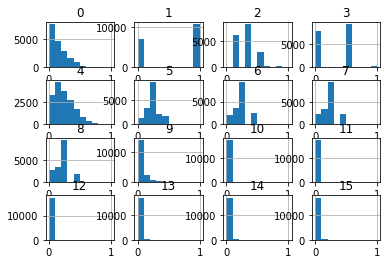

In [75]:
### HISTOGRAMS for normalised and standardised columns:-


# print(X_train_standardised[:,[0,2,3,4,6]]) ## [0,2,3,4,6] are columns that are not sparse matrices
cols_normalised_ind_list=[col_name_to_ind_convert_X_dict[col_name] for col_name in cols_to_normalise ]
df_scaled_n=pd.DataFrame(X_train_normalised[:,cols_normalised_ind_list].astype(np.float64))
df_scaled_n.hist() ### histograms after normalisation


### Model training 

In [81]:
result_dict={}

### model training using KNN algorithm


In [83]:

### hyperparameter tuning


X_train_to_use=X_train_standardised 
X_test_to_use=X_test_standardised


from sklearn.neighbors import KNeighborsClassifier  ### ()
algo_class=KNeighborsClassifier()  ### ()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

params_dict={'n_neighbors':[i for i in range(10)],'weights':['uniform','distance']} ## 
clf = RandomizedSearchCV(algo_class, params_dict, random_state=0)



# from sklearn.model_selection import GridSearchCV
# from scipy.stats import uniform

# # params_dict={'C': np.linspace(0.0,4.0,8,endpoint=False), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## 
# params_dict={'C': np.arange(0.1,4.0,0.5), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## 

# clf = GridSearchCV(algo_class, params_dict)





search = clf.fit(X_train_to_use, y_train)
print(f'best parameters obtained using {type(clf).__name__} are:- ',search.best_params_)


y_pred = search.predict(X_test_to_use)

y_train_pred=search.predict(X_train_to_use) ### to calculate variance





/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/uti

best parameters obtained using RandomizedSearchCV are:-  {'weights': 'uniform', 'n_neighbors': 9}


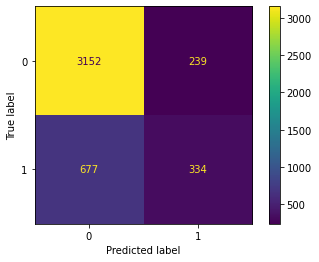

accuracy is  0.7919127669241254 

recall is  0.6299426450594624 

precision is  0.7030442334767688 

f_score is  0.6644889775906677 

a measure of bias = 0.20808723307587462 
a measure of variance = 0.03474708427142181


In [84]:

### to study the accuracy of the classification model (without any hyperparameter tuning) 


from sklearn import metrics
from matplotlib import pyplot as plt

### confusion matrix

confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
# display_labels=[0,1] ## ()
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix )
cm_display.plot()
plt.show()


### accuracy metrics
accuracy= metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred,average='macro')
precision= metrics.precision_score(y_test,y_pred,average='macro')
f_score= 2*recall*precision/(recall+precision)

print('accuracy is ',accuracy, '\n')
print('recall is ',recall, '\n')
print('precision is ',precision, '\n')
print('f_score is ',f_score, '\n')

result_dict.update({str(type(algo_class).__name__):{'accuracy':accuracy, 'recall':recall,'precision':precision,'f_score':f_score}})


### bias and variance
error_rate=1-accuracy
train_accuracy=  metrics.accuracy_score(y_train,y_train_pred) 
variance_measure=np.abs(train_accuracy - accuracy)
print('a measure of bias =',error_rate,'\na measure of variance =',variance_measure)

### model training using kernel SVM algorithm

In [105]:
### model training using kernel SVM algorithm


### define which scaling to use on the dataset for training 
X_train_to_use=X_train_standardised ### ()
X_test_to_use=X_test_standardised



from sklearn.svm import SVC  ### ()
algo_class=SVC() ### ()


### model training ; fit algorithm class to create the model
algo_class.fit(X_train_to_use, y_train) 

### model testing ; predict test data using the model
y_pred = algo_class.predict(X_test_to_use)

y_train_pred=algo_class.predict(X_train_to_use)



In [106]:
### attempted hyperparameter tuning 

## (takes too much time)

'''
X_train_to_use=X_train_standardised ### ()
X_test_to_use=X_test_standardised

# X_train_to_use=X_train ### ()
# X_test_to_use=X_test

from sklearn.svm import SVC  ### ()
algo_class=SVC() ### ()

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# params_dict={'C':uniform(loc=0,scale=4), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## 
# clf = RandomizedSearchCV(algo_class, params_dict, random_state=0)



from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# params_dict={'C': np.linspace(0.0,4.0,8,endpoint=False), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## 
params_dict={'C': np.arange(0.1,4.0,0.5), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## 

clf = GridSearchCV(algo_class, params_dict)





search = clf.fit(X_train_to_use, y_train)
print(f'best parameters obtained using {type(clf).__name__} are:- ',search.best_params_)


y_pred = search.predict(X_test_to_use)

y_train_pred=search.predict(X_train_to_use) ### to calculate variance

'''



"\nX_train_to_use=X_train_standardised ### (manual)\nX_test_to_use=X_test_standardised\n\n# X_train_to_use=X_train ### (manual)\n# X_test_to_use=X_test\n\nfrom sklearn.svm import SVC  ### (manual)\nalgo_class=SVC() ### (manual)\n\n# from sklearn.model_selection import RandomizedSearchCV\n# from scipy.stats import uniform\n\n# params_dict={'C':uniform(loc=0,scale=4), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## manual\n# clf = RandomizedSearchCV(algo_class, params_dict, random_state=0)\n\n\n\nfrom sklearn.model_selection import GridSearchCV\nfrom scipy.stats import uniform\n\n# params_dict={'C': np.linspace(0.0,4.0,8,endpoint=False), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## manual\nparams_dict={'C': np.arange(0.1,4.0,0.5), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## manual\n\nclf = Gr

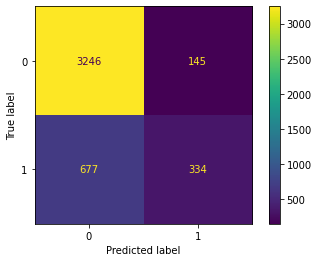

accuracy is  0.8132666969559291 

recall is  0.6438028632841749 

precision is  0.7623570006550949 

f_score is  0.6980822486164817 

a measure of bias = 0.18673330304407088 
a measure of variance = 0.006975252268811016


In [107]:

### to study the accuracy of the classification model 

from sklearn import metrics
from matplotlib import pyplot as plt

### confusion matrix

confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
# display_labels=[0,1] ## ()
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix )
cm_display.plot()
plt.show()


### accuracy metrics
accuracy= metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred,average='macro')
precision= metrics.precision_score(y_test,y_pred,average='macro')
f_score= 2*recall*precision/(recall+precision)

print('accuracy is ',accuracy, '\n')
print('recall is ',recall, '\n')
print('precision is ',precision, '\n')
print('f_score is ',f_score, '\n')

result_dict.update({str(type(algo_class).__name__):{'accuracy':accuracy, 'recall':recall,'precision':precision,'f_score':f_score}})


### bias and variance
error_rate=1-accuracy
train_accuracy=  metrics.accuracy_score(y_train,y_train_pred) 
variance_measure=np.abs(train_accuracy - accuracy)
print('a measure of bias =',error_rate,'\na measure of variance =',variance_measure)

### model training using Gradient boosting algorithm



In [89]:

### hyperparameter tuning

X_train_to_use=X_train_standardised ### ()
X_test_to_use=X_test_standardised



from sklearn.ensemble import GradientBoostingClassifier  ### ()
algo_class=GradientBoostingClassifier() ### ()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

print(algo_class.get_params())

params_dict={'learning_rate': [0.1,0.5,1.0], 'n_estimators':[50,75,100,125],'max_depth':[2,3,4,5]}
clf = RandomizedSearchCV(algo_class, params_dict, random_state=0)






search = clf.fit(X_train_to_use, y_train)
print(f'best parameters obtained using {type(clf).__name__} are:- ',search.best_params_)


y_pred = search.predict(X_test_to_use)

y_train_pred=search.predict(X_train_to_use) ### to calculate variance





{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
best parameters obtained using RandomizedSearchCV are:-  {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}


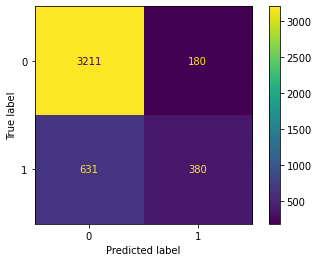

accuracy is  0.815765561108587 

recall is  0.6613918964524994 

precision is  0.7571670261024763 

f_score is  0.7060462943946669 

a measure of bias = 0.184234438891413 
a measure of variance = 0.014245230054018787


In [91]:

### to study the accuracy of the classification model 

from sklearn import metrics
from matplotlib import pyplot as plt

### confusion matrix

confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
# display_labels=[0,1] ## ()
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix )
cm_display.plot()
plt.show()


### accuracy metrics
accuracy= metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred,average='macro')
precision= metrics.precision_score(y_test,y_pred,average='macro')
f_score= 2*recall*precision/(recall+precision)

print('accuracy is ',accuracy, '\n')
print('recall is ',recall, '\n')
print('precision is ',precision, '\n')
print('f_score is ',f_score, '\n')

result_dict.update({str(type(algo_class).__name__):{'accuracy':accuracy, 'recall':recall,'precision':precision,'f_score':f_score}})


### bias and variance
error_rate=1-accuracy
train_accuracy=  metrics.accuracy_score(y_train,y_train_pred) 
variance_measure=np.abs(train_accuracy - accuracy)
print('a measure of bias =',error_rate,'\na measure of variance =',variance_measure)

### model training using AdaBoost algorithm



In [93]:

### hyperparameter tuning



X_train_to_use=X_train_standardised ### ()
X_test_to_use=X_test_standardised

# X_train_to_use=X_train ### ()
# X_test_to_use=X_test


from sklearn.ensemble import AdaBoostClassifier  ### ()
algo_class=AdaBoostClassifier() ### ()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

print(algo_class.get_params())

params_dict={'learning_rate': [0.1,0.5,1.0], 'n_estimators':[50,75,100,125]}
clf = RandomizedSearchCV(algo_class, params_dict, random_state=0)



# from sklearn.model_selection import GridSearchCV
# from scipy.stats import uniform

# # params_dict={'C': np.linspace(0.0,4.0,8,endpoint=False), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## 
# params_dict={'C': np.arange(0.1,4.0,0.5), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## 

# clf = GridSearchCV(algo_class, params_dict)





search = clf.fit(X_train_to_use, y_train)
print(f'best parameters obtained using {type(clf).__name__} are:- ',search.best_params_)


y_pred = search.predict(X_test_to_use)

y_train_pred=search.predict(X_train_to_use) ### to calculate variance





{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
best parameters obtained using RandomizedSearchCV are:-  {'n_estimators': 125, 'learning_rate': 0.1}


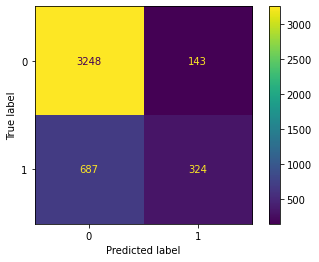

accuracy is  0.8114493412085416 

recall is  0.6391521631268666 

precision is  0.7596015552514224 

f_score is  0.6941907939538736 

a measure of bias = 0.18855065879145838 
a measure of variance = 0.0009548162288411932


In [95]:

### to study the accuracy of the classification model 

from sklearn import metrics
from matplotlib import pyplot as plt

### confusion matrix

confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
# display_labels=[0,1] ## ()
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix )
cm_display.plot()
plt.show()


### accuracy metrics
accuracy= metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred,average='macro')
precision= metrics.precision_score(y_test,y_pred,average='macro')
f_score= 2*recall*precision/(recall+precision)

print('accuracy is ',accuracy, '\n')
print('recall is ',recall, '\n')
print('precision is ',precision, '\n')
print('f_score is ',f_score, '\n')

result_dict.update({str(type(algo_class).__name__):{'accuracy':accuracy, 'recall':recall,'precision':precision,'f_score':f_score}})


### bias and variance
error_rate=1-accuracy
train_accuracy=  metrics.accuracy_score(y_train,y_train_pred) 
variance_measure=np.abs(train_accuracy - accuracy)
print('a measure of bias =',error_rate,'\na measure of variance =',variance_measure)

### model training using XGBoost algorithm



In [98]:

### hyperparameter tuning



X_train_to_use=X_train_standardised ### ()
X_test_to_use=X_test_standardised




from xgboost import XGBClassifier
algo_class=XGBClassifier() ### ()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

print(algo_class.get_params())

params_dict={'learning_rate': [0.1,0.5,1.0], 'n_estimators':[50,75,100,125],'max_depth':[2,3,4,5]}
clf = RandomizedSearchCV(algo_class, params_dict, random_state=0)



# from sklearn.model_selection import GridSearchCV
# from scipy.stats import uniform

# # params_dict={'C': np.linspace(0.0,4.0,8,endpoint=False), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## 
# params_dict={'C': np.arange(0.1,4.0,0.5), 'class_weight':[None, 'balanced'], 'gamma':['scale','auto'],'kernel':['linear','rbf','poly'],'degree':[2,3]} ## 

# clf = GridSearchCV(algo_class, params_dict)





search = clf.fit(X_train_to_use, y_train)
print(f'best parameters obtained using {type(clf).__name__} are:- ',search.best_params_)


y_pred = search.predict(X_test_to_use)

y_train_pred=search.predict(X_train_to_use) ### to calculate variance





{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
best parameters obtained using RandomizedSearchCV are:-  {'n_estimators': 100, 

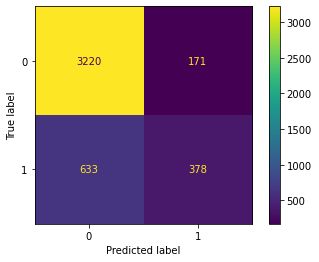

accuracy is  0.8173557473875511 

recall is  0.6617298189394688 

precision is  0.7621185110176018 

f_score is  0.7083852032488608 

a measure of bias = 0.18264425261244888 
a measure of variance = 0.008963330252024004


In [100]:

### to study the accuracy of the classification model 

from sklearn import metrics
from matplotlib import pyplot as plt

### confusion matrix

confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
# display_labels=[0,1] ## ()
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix )
cm_display.plot()
plt.show()


### accuracy metrics
accuracy= metrics.accuracy_score(y_test,y_pred)
recall= metrics.recall_score(y_test,y_pred,average='macro')
precision= metrics.precision_score(y_test,y_pred,average='macro')
f_score= 2*recall*precision/(recall+precision)

print('accuracy is ',accuracy, '\n')
print('recall is ',recall, '\n')
print('precision is ',precision, '\n')
print('f_score is ',f_score, '\n')

result_dict.update({str(type(algo_class).__name__):{'accuracy':accuracy, 'recall':recall,'precision':precision,'f_score':f_score}})


### bias and variance
error_rate=1-accuracy
train_accuracy=  metrics.accuracy_score(y_train,y_train_pred) 
variance_measure=np.abs(train_accuracy - accuracy)
print('a measure of bias =',error_rate,'\na measure of variance =',variance_measure)

## results

In [108]:
pd.DataFrame(result_dict)

,KNeighborsClassifier,SVC,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier
accuracy,0.791913,0.813267,0.815766,0.811449,0.817356
recall,0.629943,0.643803,0.661392,0.639152,0.661730
precision,0.703044,0.762357,0.757167,0.759602,0.762119
f_score,0.664489,0.698082,0.706046,0.694191,0.708385
